# 📊 Exploração de Dados - Dataset Soja e Milho

**Objetivo:** Análise exploratória completa do dataset `soja_milho.csv` com foco em medidas de tendência central, detecção de outliers e análise de correlações.

**Dataset:** Preços históricos de Soja e Milho com informações temporais (Data, Mês, Safra)

**Nota:** As variáveis 'Mês' e 'Safra' são tratadas como categóricas, pois representam partes da data (mês do ano e ano/safra respectivamente).


## 📋 Índice do Notebook

### **[1. Importação das Bibliotecas Necessárias](#1-importação-das-bibliotecas-necessárias)**
- Configuração do ambiente e importação de bibliotecas

### **[2. Carregamento e Primeira Inspeção dos Dados](#2-carregamento-e-primeira-inspeção-dos-dados)**
- Carregamento do dataset com tratamento de codificação
- Primeira visualização e informações básicas

### **[3. Análise de Qualidade dos Dados](#3-análise-de-qualidade-dos-dados)**
- Verificação de valores ausentes e duplicados
- Análise de tipos de dados e valores únicos

### **[4. Análise Descritiva e Medidas de Tendência Central](#4-análise-descritiva-e-medidas-de-tendência-central)**
- Estatísticas descritivas básicas
- Medidas de tendência central (média, mediana, moda)
- Medidas de dispersão e forma

### **[5. Visualizações das Medidas de Tendência Central](#5-visualizações-das-medidas-de-tendência-central)**
- Histogramas e box plots
- Visualizações comparativas

### **[6. Análise de Espalhamento e Detecção de Outliers](#6-análise-de-espalhamento-e-detecção-de-outliers)**
- **[6.1 Análise Univariada de Outliers](#61-análise-univariada-de-outliers)**: Box plots e detecção IQR
- **[6.2 Análise Multivariada de Outliers - Bag Plot](#62-análise-multivariada-de-outliers---bag-plot)**: Distâncias de Mahalanobis

### **[7. Análise de Correlação e Covariância](#7-análise-de-correlação-e-covariância)**
- **[7.1 Matriz de Correlação](#71-matriz-de-correlação)**: Correlações de Pearson e significância
- **[7.2 Matriz de Covariância](#72-matriz-de-covariância)**: Análise de dispersão conjunta

### **[8. Resumo e Conclusões](#8-resumo-e-conclusões)**
- Síntese dos principais achados

### **[9. Informações Técnicas do Notebook](#9-informações-técnicas-do-notebook)**
- Detalhes sobre bibliotecas e versões utilizadas

---


## 1. Importação das Bibliotecas Necessárias


In [10]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configurações para melhor visualização
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"📈 Matplotlib: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn: {sns.__version__}")


✅ Bibliotecas importadas com sucesso!
📊 Pandas: 1.4.3
🔢 NumPy: 1.24.4
📈 Matplotlib: 3.7.2
🎨 Seaborn: 0.12.2


## 2. Carregamento e Primeira Inspeção dos Dados


In [11]:
# Carregamento do dataset com tratamento de codificação
def load_dataset(file_path):
    """
    Carrega o dataset tentando diferentes codificações de caracteres
    """
    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1', 'utf-16']
    
    for encoding in encodings:
        try:
            print(f"🔄 Tentando carregar com codificação: {encoding}")
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Dataset carregado com sucesso usando codificação: {encoding}")
            return df
        except UnicodeDecodeError:
            print(f"❌ Falha com codificação: {encoding}")
            continue
        except Exception as e:
            print(f"❌ Erro com codificação {encoding}: {e}")
            continue
    
    # Se todas as codificações falharem, tenta com errors='ignore'
    try:
        print("🔄 Tentando carregar ignorando caracteres problemáticos...")
        df = pd.read_csv(file_path, encoding='utf-8', errors='ignore')
        print("✅ Dataset carregado ignorando caracteres problemáticos")
        return df
    except Exception as e:
        print(f"❌ Erro final ao carregar o arquivo: {e}")
        return None

# Carregar o dataset
df = load_dataset('soja_milho.csv')

if df is not None:
    print(f"\n📊 Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas")
    
    # Remover coluna de observação (índice dos registros) se existir
    if 'Observação' in df.columns:
        df = df.drop('Observação', axis=1)
        print("🗑️ Coluna 'Observação' removida (era apenas índice dos registros)")
        print(f"📊 Dataset final: {df.shape[0]} linhas e {df.shape[1]} colunas")
    elif 'Observacao' in df.columns:
        df = df.drop('Observacao', axis=1)
        print("🗑️ Coluna 'Observacao' removida (era apenas índice dos registros)")
        print(f"📊 Dataset final: {df.shape[0]} linhas e {df.shape[1]} colunas")
        
    # Converter colunas de data para categóricas
    if 'Mes' in df.columns:
        df['Mes'] = df['Mes'].astype('category')
        print("📅 Coluna 'Mes' convertida para categórica")
    
    if 'Safra' in df.columns:
        df['Safra'] = df['Safra'].astype('category')
        print("📅 Coluna 'Safra' convertida para categórica")
        
else:
    print("❌ Não foi possível carregar o dataset")


🔄 Tentando carregar com codificação: utf-8
❌ Falha com codificação: utf-8
🔄 Tentando carregar com codificação: latin-1
✅ Dataset carregado com sucesso usando codificação: latin-1

📊 Dataset carregado com 498 linhas e 6 colunas
🗑️ Coluna 'Observação' removida (era apenas índice dos registros)
📊 Dataset final: 498 linhas e 5 colunas
📅 Coluna 'Mes' convertida para categórica
📅 Coluna 'Safra' convertida para categórica


## 3. Análise de Qualidade dos Dados


In [12]:
# Análise de qualidade dos dados
if df is not None:
    print("=" * 60)
    print("ANÁLISE DE QUALIDADE DOS DADOS")
    print("=" * 60)
    
    # Informações gerais
    print(f"\n📊 INFORMAÇÕES GERAIS:")
    print(f"  • Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
    print(f"  • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Tipos de dados
    print(f"\n📋 TIPOS DE DADOS:")
    print(df.dtypes)
    
    # Valores ausentes
    print(f"\n❌ VALORES AUSENTES:")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    if missing_values.sum() > 0:
        for col in missing_values.index:
            if missing_values[col] > 0:
                print(f"  • {col}: {missing_values[col]} ({missing_percent[col]:.2f}%)")
    else:
        print("  ✅ Nenhum valor ausente encontrado!")
    
    # Valores duplicados
    print(f"\n🔄 VALORES DUPLICADOS:")
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"  • Total de linhas duplicadas: {duplicates}")
        print(f"  • Percentual: {(duplicates/len(df)*100):.2f}%")
    else:
        print("  ✅ Nenhuma linha duplicada encontrada!")
    
    # Valores únicos por coluna
    print(f"\n🔍 VALORES ÚNICOS POR COLUNA:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"  • {col}: {unique_count} valores únicos")
    
    # Primeiras linhas
    print(f"\n📄 PRIMEIRAS 5 LINHAS:")
    print(df.head())
    
    # Estatísticas básicas
    print(f"\n📊 ESTATÍSTICAS BÁSICAS:")
    print(df.describe())
    
else:
    print("❌ Dataset não carregado. Verifique o arquivo 'soja_milho.csv'")


ANÁLISE DE QUALIDADE DOS DADOS

📊 INFORMAÇÕES GERAIS:
  • Dimensões: 498 linhas × 5 colunas
  • Memória utilizada: 0.04 MB

📋 TIPOS DE DADOS:
Data       object
Mes      category
Safra    category
Milho     float64
Soja      float64
dtype: object

❌ VALORES AUSENTES:
  ✅ Nenhum valor ausente encontrado!

🔄 VALORES DUPLICADOS:
  ✅ Nenhuma linha duplicada encontrada!

🔍 VALORES ÚNICOS POR COLUNA:
  • Data: 498 valores únicos
  • Mes: 12 valores únicos
  • Safra: 2 valores únicos
  • Milho: 393 valores únicos
  • Soja: 424 valores únicos

📄 PRIMEIRAS 5 LINHAS:
         Data Mes Safra  Milho   Soja
0  02/01/2014   1  2014  26.64  72.18
1  03/01/2014   1  2014  27.00  71.42
2  06/01/2014   1  2014  27.29  71.38
3  07/01/2014   1  2014  27.49  70.31
4  08/01/2014   1  2014  27.16  70.14

📊 ESTATÍSTICAS BÁSICAS:
            Milho        Soja
count  498.000000  498.000000
mean    27.955080   66.498273
std      3.563466    5.804226
min     21.760000   56.740000
25%     25.510000   62.302500
50% 

In [13]:
# Análise descritiva e medidas de tendência central
if df is not None:
    print("=" * 60)
    print("ANÁLISE DESCRITIVA E MEDIDAS DE TENDÊNCIA CENTRAL")
    print("=" * 60)
    
    # Identificar variáveis numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    
    print(f"\n📊 VARIÁVEIS NUMÉRICAS: {numeric_cols}")
    print(f"📊 VARIÁVEIS CATEGÓRICAS: {categorical_cols}")
    
    if len(numeric_cols) > 0:
        # Estatísticas descritivas
        print(f"\n📈 ESTATÍSTICAS DESCRITIVAS:")
        print("-" * 40)
        desc_stats = df[numeric_cols].describe()
        print(desc_stats.round(4))
        
        # Medidas de tendência central
        print(f"\n🎯 MEDIDAS DE TENDÊNCIA CENTRAL:")
        print("-" * 40)
        
        for col in numeric_cols:
            print(f"\n📊 {col}:")
            print(f"  • Média: {df[col].mean():.4f}")
            print(f"  • Mediana: {df[col].median():.4f}")
            print(f"  • Moda: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
            print(f"  • Média aparada (10%): {stats.trim_mean(df[col].dropna(), 0.1):.4f}")
        
        # Medidas de dispersão
        print(f"\n📏 MEDIDAS DE DISPERSÃO:")
        print("-" * 40)
        
        for col in numeric_cols:
            print(f"\n📊 {col}:")
            print(f"  • Desvio padrão: {df[col].std():.4f}")
            print(f"  • Variância: {df[col].var():.4f}")
            print(f"  • Amplitude: {df[col].max() - df[col].min():.4f}")
            print(f"  • IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")
            print(f"  • Coeficiente de variação: {(df[col].std() / df[col].mean() * 100):.2f}%")
        
        # Medidas de forma
        print(f"\n📐 MEDIDAS DE FORMA:")
        print("-" * 40)
        
        for col in numeric_cols:
            print(f"\n📊 {col}:")
            print(f"  • Assimetria: {stats.skew(df[col].dropna()):.4f}")
            print(f"  • Curtose: {stats.kurtosis(df[col].dropna()):.4f}")
        
        # Quartis e percentis
        print(f"\n📊 QUARTIS E PERCENTIS:")
        print("-" * 40)
        
        for col in numeric_cols:
            print(f"\n📊 {col}:")
            print(f"  • Q1 (25%): {df[col].quantile(0.25):.4f}")
            print(f"  • Q2 (50%): {df[col].quantile(0.50):.4f}")
            print(f"  • Q3 (75%): {df[col].quantile(0.75):.4f}")
            print(f"  • P90: {df[col].quantile(0.90):.4f}")
            print(f"  • P95: {df[col].quantile(0.95):.4f}")
            print(f"  • P99: {df[col].quantile(0.99):.4f}")
    
    else:
        print("⚠️  Nenhuma variável numérica encontrada para análise.")
        
else:
    print("❌ Dataset não carregado. Verifique o arquivo 'soja_milho.csv'")


ANÁLISE DESCRITIVA E MEDIDAS DE TENDÊNCIA CENTRAL

📊 VARIÁVEIS NUMÉRICAS: ['Milho', 'Soja']
📊 VARIÁVEIS CATEGÓRICAS: ['Data', 'Mes', 'Safra']

📈 ESTATÍSTICAS DESCRITIVAS:
----------------------------------------
          Milho      Soja
count  498.0000  498.0000
mean    27.9551   66.4983
std      3.5635    5.8042
min     21.7600   56.7400
25%     25.5100   62.3025
50%     27.5350   65.1650
75%     30.3200   69.1875
max     36.8300   79.8600

🎯 MEDIDAS DE TENDÊNCIA CENTRAL:
----------------------------------------

📊 Milho:
  • Média: 27.9551
  • Mediana: 27.5350
  • Moda: 25.16
  • Média aparada (10%): 27.8608

📊 Soja:
  • Média: 66.4983
  • Mediana: 65.1650
  • Moda: 62.02
  • Média aparada (10%): 66.1054

📏 MEDIDAS DE DISPERSÃO:
----------------------------------------

📊 Milho:
  • Desvio padrão: 3.5635
  • Variância: 12.6983
  • Amplitude: 15.0700
  • IQR: 4.8100
  • Coeficiente de variação: 12.75%

📊 Soja:
  • Desvio padrão: 5.8042
  • Variância: 33.6890
  • Amplitude: 23.1200
  

VISUALIZAÇÕES DAS MEDIDAS DE TENDÊNCIA CENTRAL


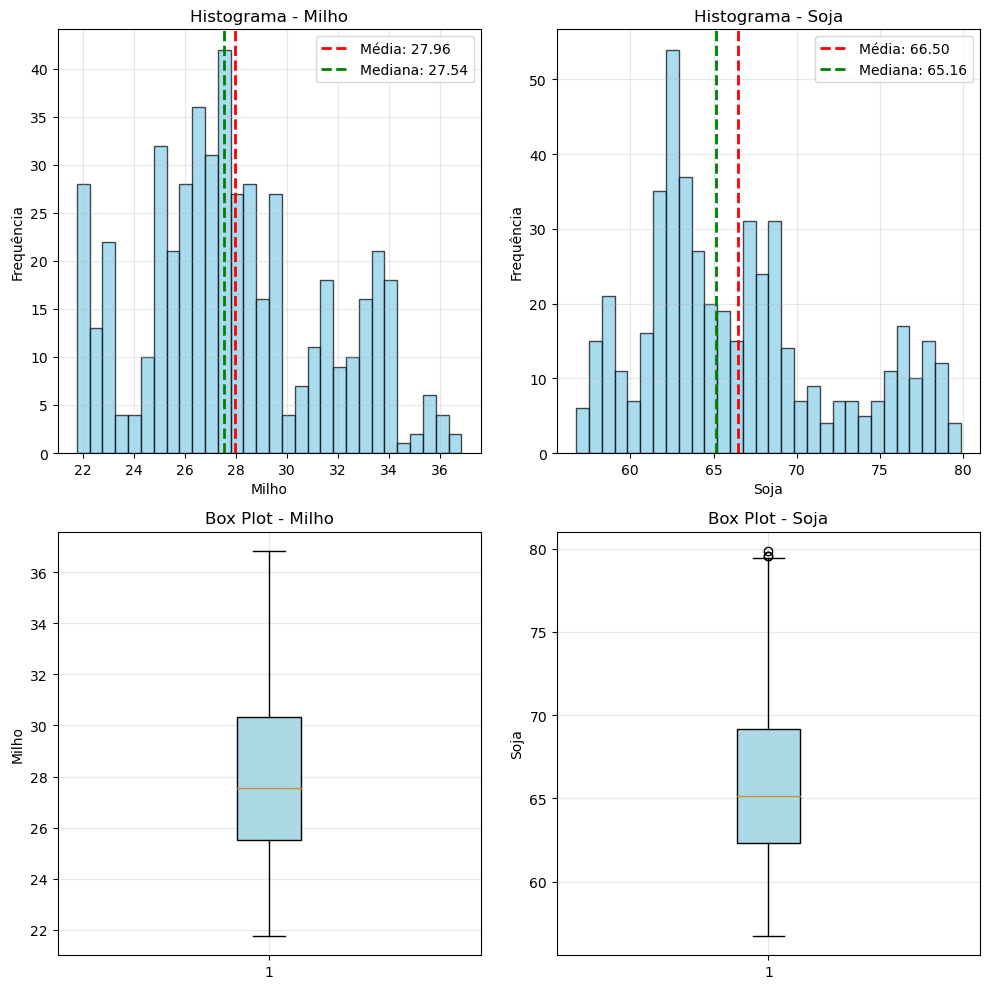

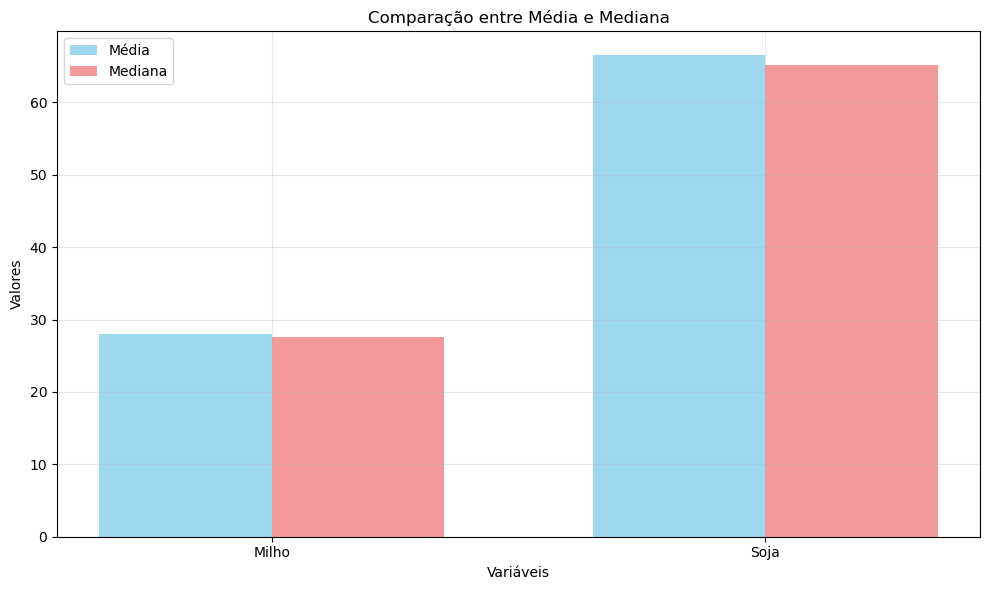

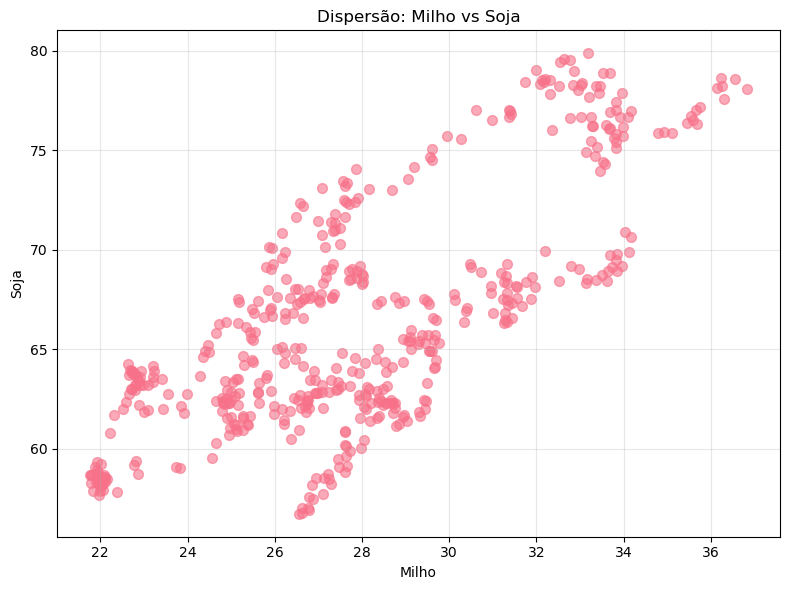


📊 Correlação entre Milho e Soja: 0.7491


In [14]:
# Visualizações das medidas de tendência central
if df is not None and len(numeric_cols) > 0:
    print("=" * 60)
    print("VISUALIZAÇÕES DAS MEDIDAS DE TENDÊNCIA CENTRAL")
    print("=" * 60)
    
    # Configurar subplots
    n_cols = len(numeric_cols)
    fig, axes = plt.subplots(2, n_cols, figsize=(5*n_cols, 10))
    
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Histogramas e box plots
    for i, col in enumerate(numeric_cols):
        # Histograma
        axes[0, i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df[col].mean():.2f}')
        axes[0, i].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df[col].median():.2f}')
        axes[0, i].set_title(f'Histograma - {col}')
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Frequência')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)
        
        # Box plot
        box_plot = axes[1, i].boxplot(df[col].dropna(), patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[1, i].set_title(f'Box Plot - {col}')
        axes[1, i].set_ylabel(col)
        axes[1, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Gráfico de comparação das médias
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 6))
        
        means = [df[col].mean() for col in numeric_cols]
        medians = [df[col].median() for col in numeric_cols]
        
        x = np.arange(len(numeric_cols))
        width = 0.35
        
        plt.bar(x - width/2, means, width, label='Média', alpha=0.8, color='skyblue')
        plt.bar(x + width/2, medians, width, label='Mediana', alpha=0.8, color='lightcoral')
        
        plt.xlabel('Variáveis')
        plt.ylabel('Valores')
        plt.title('Comparação entre Média e Mediana')
        plt.xticks(x, numeric_cols)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Gráfico de dispersão se houver 2 variáveis numéricas
    if len(numeric_cols) == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.6, s=50)
        plt.xlabel(numeric_cols[0])
        plt.ylabel(numeric_cols[1])
        plt.title(f'Dispersão: {numeric_cols[0]} vs {numeric_cols[1]}')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Calcular correlação
        correlation = df[numeric_cols[0]].corr(df[numeric_cols[1]])
        print(f"\n📊 Correlação entre {numeric_cols[0]} e {numeric_cols[1]}: {correlation:.4f}")
    
else:
    print("⚠️  Não há variáveis numéricas para visualização.")


ANÁLISE DE ESPALHAMENTO E DETECÇÃO DE OUTLIERS


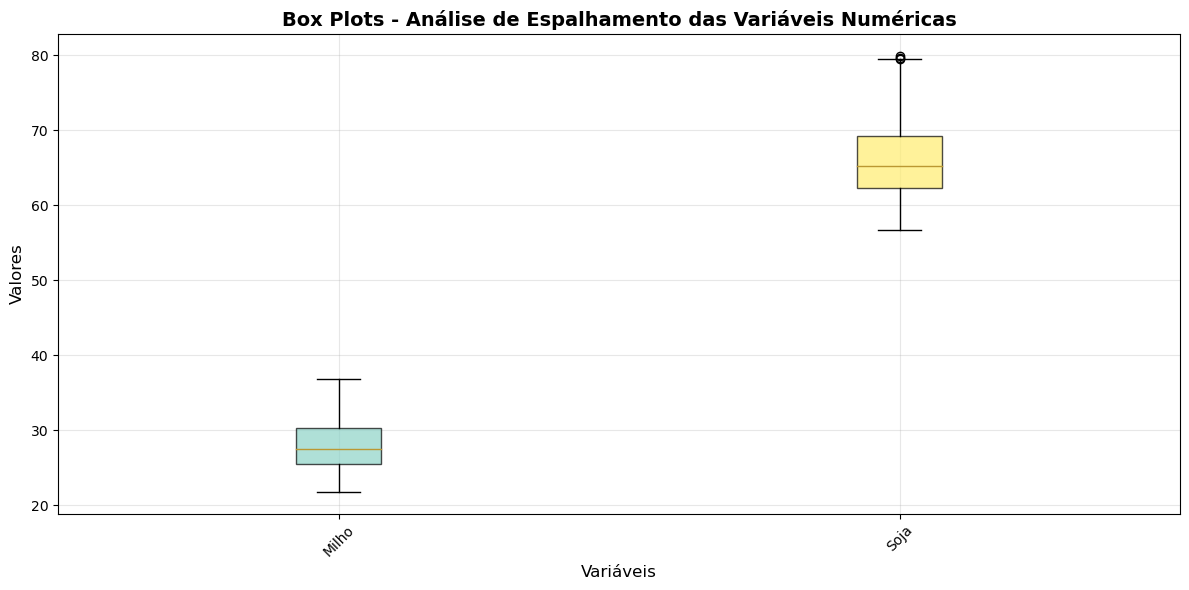


DETECÇÃO E ANÁLISE DE OUTLIERS

📊 Milho:
  • Q1: 25.5100
  • Q3: 30.3200
  • IQR: 4.8100
  • Limite inferior: 18.2950
  • Limite superior: 37.5350
  • Outliers detectados: 0 (0.00%)
  • ✅ Nenhum outlier detectado

📊 Soja:
  • Q1: 62.3025
  • Q3: 69.1875
  • IQR: 6.8850
  • Limite inferior: 51.9750
  • Limite superior: 79.5150
  • Outliers detectados: 3 (0.60%)
  • Valores outliers: [79.57, 79.86, 79.53]
  • Índices dos outliers: [432, 435, 451]

LINHAS COM OUTLIERS

📋 Total de linhas com pelo menos um outlier: 3
📊 Linhas com outliers (índices): [432, 435, 451]

📄 DADOS COMPLETOS DAS LINHAS COM OUTLIERS:
--------------------------------------------------------------------------------

Linha 432:
  Milho: 32.6200
  Soja: 79.5700 ⚠️ OUTLIER
  Data: 24/09/2015
  Mes: 9
  Safra: 2015
----------------------------------------

Linha 435:
  Milho: 33.1900
  Soja: 79.8600 ⚠️ OUTLIER
  Data: 29/09/2015
  Mes: 9
  Safra: 2015
----------------------------------------

Linha 451:
  Milho: 32.7600


In [15]:
# Análise de espalhamento e detecção de outliers - Univariada
if df is not None and len(numeric_cols) > 0:
    print("=" * 60)
    print("ANÁLISE DE ESPALHAMENTO E DETECÇÃO DE OUTLIERS")
    print("=" * 60)
    
    # Box plots para análise de espalhamento das variáveis numéricas
    plt.figure(figsize=(12, 6))
    
    # Preparar dados para box plot
    data_for_box = []
    labels = []
    
    for col in numeric_cols:
        data = df[col].dropna()
        data_for_box.append(data)
        labels.append(col)
    
    # Criar box plot
    box_plot = plt.boxplot(data_for_box, labels=labels, patch_artist=True)
    
    # Colorir os boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(numeric_cols)))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Box Plots - Análise de Espalhamento das Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.xlabel('Variáveis', fontsize=12)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Análise detalhada de outliers
    print("\n" + "=" * 60)
    print("DETECÇÃO E ANÁLISE DE OUTLIERS")
    print("=" * 60)
    
    outliers_info = {}
    
    for col in numeric_cols:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outlier_mask = (data < lower_bound) | (data > upper_bound)
        outliers = data[outlier_mask]
        outlier_indices = data[outlier_mask].index.tolist()
        
        print(f"\n📊 {col}:")
        print(f"  • Q1: {Q1:.4f}")
        print(f"  • Q3: {Q3:.4f}")
        print(f"  • IQR: {IQR:.4f}")
        print(f"  • Limite inferior: {lower_bound:.4f}")
        print(f"  • Limite superior: {upper_bound:.4f}")
        print(f"  • Outliers detectados: {len(outliers)} ({(len(outliers)/len(data)*100):.2f}%)")
        
        if len(outliers) > 0:
            print(f"  • Valores outliers: {outliers.tolist()}")
            print(f"  • Índices dos outliers: {outlier_indices}")
            
            # Armazenar informações dos outliers para análise posterior
            outliers_info[col] = {
                'values': outliers.tolist(),
                'indices': outlier_indices,
                'count': len(outliers)
            }
        else:
            print(f"  • ✅ Nenhum outlier detectado")
            outliers_info[col] = {
                'values': [],
                'indices': [],
                'count': 0
            }
    
    # Análise das linhas com outliers
    if any(info['count'] > 0 for info in outliers_info.values()):
        print("\n" + "=" * 60)
        print("LINHAS COM OUTLIERS")
        print("=" * 60)
        
        # Coletar todos os índices que têm outliers
        all_outlier_indices = set()
        for col, info in outliers_info.items():
            if info['count'] > 0:
                all_outlier_indices.update(info['indices'])
        
        if all_outlier_indices:
            print(f"\n📋 Total de linhas com pelo menos um outlier: {len(all_outlier_indices)}")
            print(f"📊 Linhas com outliers (índices): {sorted(list(all_outlier_indices))}")
            
            # Mostrar as linhas completas que contêm outliers
            print(f"\n📄 DADOS COMPLETOS DAS LINHAS COM OUTLIERS:")
            print("-" * 80)
            
            outlier_rows = df.loc[sorted(all_outlier_indices)]
            for idx, row in outlier_rows.iterrows():
                print(f"\nLinha {idx}:")
                for col in numeric_cols:
                    value = row[col]
                    if col in outliers_info and idx in outliers_info[col]['indices']:
                        print(f"  {col}: {value:.4f} ⚠️ OUTLIER")
                    else:
                        print(f"  {col}: {value:.4f}")
                
                # Mostrar também as variáveis categóricas para contexto
                for col in categorical_cols:
                    print(f"  {col}: {row[col]}")
                print("-" * 40)
    
    else:
        print("\n✅ Nenhum outlier detectado em nenhuma variável numérica!")
        
else:
    print("⚠️  Não há variáveis numéricas para análise de espalhamento.")


ANÁLISE DE CORRELAÇÃO E COVARIÂNCIA

📊 MATRIZ DE CORRELAÇÃO:
----------------------------------------
        Milho    Soja
Milho  1.0000  0.7491
Soja   0.7491  1.0000

📈 ANÁLISE DAS CORRELAÇÕES:
----------------------------------------
  • Milho ↔ Soja: 0.7491 (correlação forte positiva)


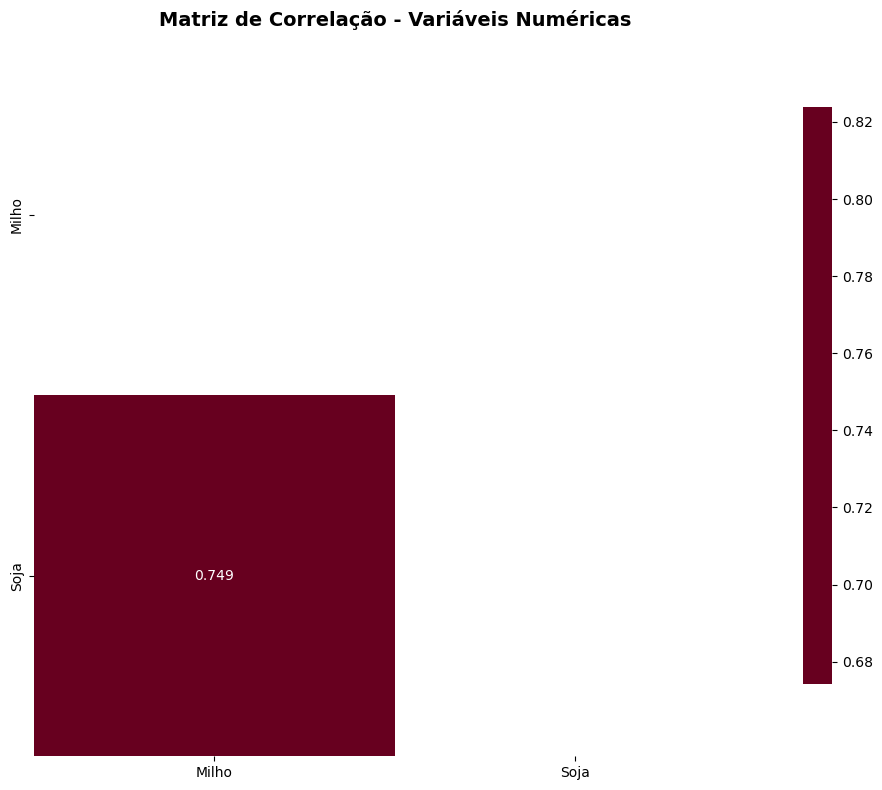


📊 TESTE DE SIGNIFICÂNCIA DAS CORRELAÇÕES:
--------------------------------------------------
  • Milho ↔ Soja: r = 0.7491, *** (p < 0.001)

ANÁLISE DE COVARIÂNCIA

📊 MATRIZ DE COVARIÂNCIA:
----------------------------------------
         Milho     Soja
Milho  12.6983  15.4937
Soja   15.4937  33.6890

📈 ANÁLISE DAS COVARIÂNCIAS:
----------------------------------------
  • Milho ↔ Soja: 15.4937 (covariância positiva)


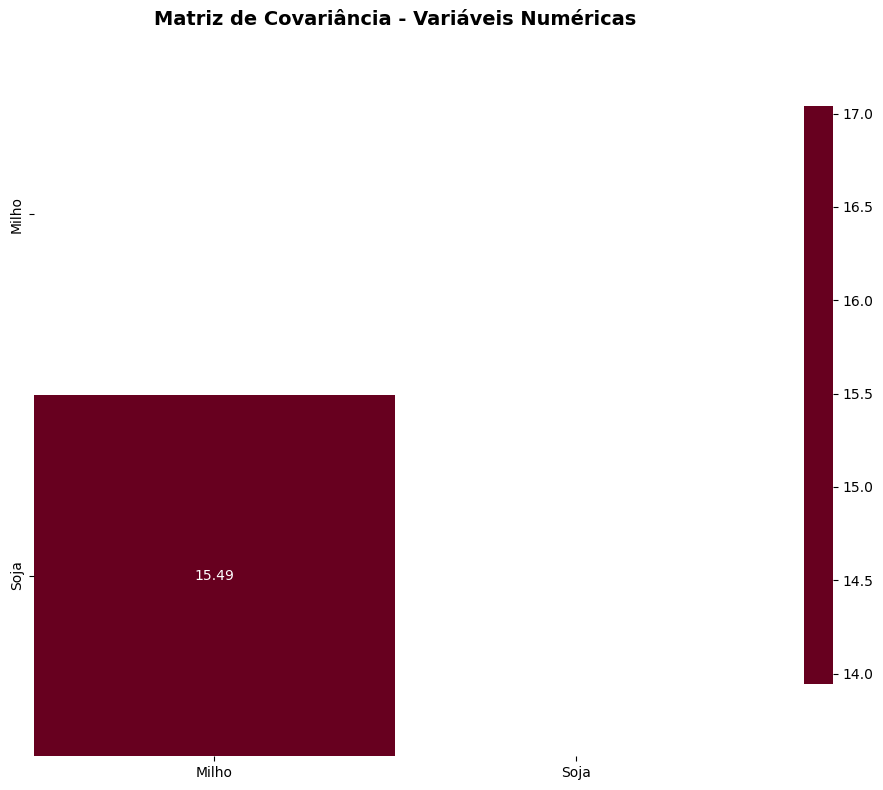


📊 ANÁLISE DAS VARIÂNCIAS:
----------------------------------------
  • Milho: 12.6983
  • Soja: 33.6890

📊 COMPARAÇÃO: CORRELAÇÃO vs COVARIÂNCIA:
--------------------------------------------------
Correlação: medida padronizada (-1 a +1)
Covariância: medida não padronizada (depende das unidades)

Interpretação:
  • Correlação: força da relação linear
  • Covariância: magnitude da variação conjunta

📊 COEFICIENTE DE VARIAÇÃO:
----------------------------------------
  • Milho: 12.75%
  • Soja: 8.73%

📊 ANÁLISE DE DISPERSÃO CONJUNTA:
----------------------------------------
  • Determinante da matriz de covariância: 187.7399
  • Traço da matriz de covariância: 46.3873
  • Autovalores: [ 4.47986711 41.90746722]
  • Proporção da variância explicada pelo primeiro componente: 9.66%


In [16]:
# Análise de correlação e covariância
if df is not None and len(numeric_cols) > 1:
    print("=" * 60)
    print("ANÁLISE DE CORRELAÇÃO E COVARIÂNCIA")
    print("=" * 60)
    
    # Calcular matriz de correlação
    correlation_matrix = df[numeric_cols].corr()
    
    print(f"\n📊 MATRIZ DE CORRELAÇÃO:")
    print("-" * 40)
    print(correlation_matrix.round(4))
    
    # Análise das correlações
    print(f"\n📈 ANÁLISE DAS CORRELAÇÕES:")
    print("-" * 40)
    
    # Encontrar correlações mais fortes
    corr_pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_value))
    
    # Ordenar por valor absoluto da correlação
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for var1, var2, corr in corr_pairs:
        strength = ""
        if abs(corr) >= 0.9:
            strength = "muito forte"
        elif abs(corr) >= 0.7:
            strength = "forte"
        elif abs(corr) >= 0.5:
            strength = "moderada"
        elif abs(corr) >= 0.3:
            strength = "fraca"
        else:
            strength = "muito fraca"
        
        direction = "positiva" if corr > 0 else "negativa"
        print(f"  • {var1} ↔ {var2}: {corr:.4f} (correlação {strength} {direction})")
    
    # Visualização da matriz de correlação
    plt.figure(figsize=(10, 8))
    
    # Heatmap da correlação
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise de significância estatística das correlações
    from scipy.stats import pearsonr
    
    print(f"\n📊 TESTE DE SIGNIFICÂNCIA DAS CORRELAÇÕES:")
    print("-" * 50)
    
    for var1, var2, corr in corr_pairs:
        # Calcular p-valor
        data1 = df[var1].dropna()
        data2 = df[var2].dropna()
        
        # Alinhar os dados (remover pares com valores ausentes)
        common_idx = data1.index.intersection(data2.index)
        if len(common_idx) > 2:
            corr_coef, p_value = pearsonr(data1[common_idx], data2[common_idx])
            
            significance = ""
            if p_value < 0.001:
                significance = "*** (p < 0.001)"
            elif p_value < 0.01:
                significance = "** (p < 0.01)"
            elif p_value < 0.05:
                significance = "* (p < 0.05)"
            else:
                significance = "não significativa"
            
            print(f"  • {var1} ↔ {var2}: r = {corr_coef:.4f}, {significance}")
    
    # Análise de covariância
    print(f"\n" + "=" * 60)
    print("ANÁLISE DE COVARIÂNCIA")
    print("=" * 60)
    
    # Calcular matriz de covariância
    covariance_matrix = df[numeric_cols].cov()
    
    print(f"\n📊 MATRIZ DE COVARIÂNCIA:")
    print("-" * 40)
    print(covariance_matrix.round(4))
    
    # Análise das covariâncias
    print(f"\n📈 ANÁLISE DAS COVARIÂNCIAS:")
    print("-" * 40)
    
    # Encontrar covariâncias mais fortes
    cov_pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            cov_value = covariance_matrix.iloc[i, j]
            cov_pairs.append((numeric_cols[i], numeric_cols[j], cov_value))
    
    # Ordenar por valor absoluto da covariância
    cov_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for var1, var2, cov in cov_pairs:
        direction = "positiva" if cov > 0 else "negativa"
        print(f"  • {var1} ↔ {var2}: {cov:.4f} (covariância {direction})")
    
    # Visualização da matriz de covariância
    plt.figure(figsize=(10, 8))
    
    # Heatmap da covariância
    mask = np.triu(np.ones_like(covariance_matrix, dtype=bool))
    sns.heatmap(covariance_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Covariância - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise das variâncias (diagonal da matriz de covariância)
    print(f"\n📊 ANÁLISE DAS VARIÂNCIAS:")
    print("-" * 40)
    
    variances = np.diag(covariance_matrix)
    for i, var in enumerate(numeric_cols):
        print(f"  • {var}: {variances[i]:.4f}")
    
    # Comparação entre correlação e covariância
    print(f"\n📊 COMPARAÇÃO: CORRELAÇÃO vs COVARIÂNCIA:")
    print("-" * 50)
    print("Correlação: medida padronizada (-1 a +1)")
    print("Covariância: medida não padronizada (depende das unidades)")
    print("\nInterpretação:")
    print("  • Correlação: força da relação linear")
    print("  • Covariância: magnitude da variação conjunta")
    
    # Calcular coeficiente de variação para cada variável
    print(f"\n📊 COEFICIENTE DE VARIAÇÃO:")
    print("-" * 40)
    
    for var in numeric_cols:
        mean_val = df[var].mean()
        std_val = df[var].std()
        cv = (std_val / mean_val) * 100 if mean_val != 0 else 0
        print(f"  • {var}: {cv:.2f}%")
    
    # Análise de dispersão conjunta
    print(f"\n📊 ANÁLISE DE DISPERSÃO CONJUNTA:")
    print("-" * 40)
    
    # Determinante da matriz de covariância (medida de dispersão multivariada)
    det_cov = np.linalg.det(covariance_matrix)
    print(f"  • Determinante da matriz de covariância: {det_cov:.4f}")
    
    # Traço da matriz de covariância (soma das variâncias)
    trace_cov = np.trace(covariance_matrix)
    print(f"  • Traço da matriz de covariância: {trace_cov:.4f}")
    
    # Autovalores da matriz de covariância
    eigenvals = np.linalg.eigvals(covariance_matrix)
    print(f"  • Autovalores: {eigenvals}")
    print(f"  • Proporção da variância explicada pelo primeiro componente: {(eigenvals[0]/sum(eigenvals)*100):.2f}%")
    
else:
    print("⚠️  Análise de correlação e covariância requer pelo menos 2 variáveis numéricas.")
    print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


In [17]:
# Resumo e conclusões
if df is not None:
    print("=" * 60)
    print("RESUMO E CONCLUSÕES")
    print("=" * 60)
    
    print(f"\n📊 RESUMO GERAL DO DATASET:")
    print(f"  • Total de observações: {df.shape[0]}")
    print(f"  • Total de variáveis: {df.shape[1]}")
    print(f"  • Variáveis numéricas: {len(numeric_cols)}")
    print(f"  • Variáveis categóricas: {len(categorical_cols)}")
    
    if len(numeric_cols) > 0:
        print(f"\n📈 PRINCIPAIS ACHADOS DAS VARIÁVEIS NUMÉRICAS:")
        for col in numeric_cols:
            print(f"\n  📊 {col}:")
            print(f"    • Média: {df[col].mean():.4f}")
            print(f"    • Mediana: {df[col].median():.4f}")
            print(f"    • Desvio padrão: {df[col].std():.4f}")
            print(f"    • Coeficiente de variação: {(df[col].std() / df[col].mean() * 100):.2f}%")
            print(f"    • Amplitude: {df[col].max() - df[col].min():.4f}")
    
    if len(numeric_cols) > 1:
        print(f"\n🔗 ANÁLISE DE CORRELAÇÕES:")
        correlation_matrix = df[numeric_cols].corr()
        for i in range(len(numeric_cols)):
            for j in range(i+1, len(numeric_cols)):
                corr_value = correlation_matrix.iloc[i, j]
                print(f"  • {numeric_cols[i]} ↔ {numeric_cols[j]}: {corr_value:.4f}")
    
    print(f"\n✅ QUALIDADE DOS DADOS:")
    missing_values = df.isnull().sum().sum()
    duplicates = df.duplicated().sum()
    print(f"  • Valores ausentes: {missing_values}")
    print(f"  • Linhas duplicadas: {duplicates}")
    
    if missing_values == 0 and duplicates == 0:
        print("  • ✅ Dataset limpo e pronto para análise!")
    else:
        print("  • ⚠️  Dataset requer limpeza adicional")
    
    print(f"\n🎯 RECOMENDAÇÕES:")
    print(f"  • Analisar tendências temporais nos preços")
    print(f"  • Investigar sazonalidade nos dados")
    print(f"  • Considerar análise de séries temporais")
    print(f"  • Avaliar impacto de eventos externos nos preços")
    
else:
    print("❌ Dataset não carregado. Verifique o arquivo 'soja_milho.csv'")


RESUMO E CONCLUSÕES

📊 RESUMO GERAL DO DATASET:
  • Total de observações: 498
  • Total de variáveis: 5
  • Variáveis numéricas: 2
  • Variáveis categóricas: 3

📈 PRINCIPAIS ACHADOS DAS VARIÁVEIS NUMÉRICAS:

  📊 Milho:
    • Média: 27.9551
    • Mediana: 27.5350
    • Desvio padrão: 3.5635
    • Coeficiente de variação: 12.75%
    • Amplitude: 15.0700

  📊 Soja:
    • Média: 66.4983
    • Mediana: 65.1650
    • Desvio padrão: 5.8042
    • Coeficiente de variação: 8.73%
    • Amplitude: 23.1200

🔗 ANÁLISE DE CORRELAÇÕES:
  • Milho ↔ Soja: 0.7491

✅ QUALIDADE DOS DADOS:
  • Valores ausentes: 0
  • Linhas duplicadas: 0
  • ✅ Dataset limpo e pronto para análise!

🎯 RECOMENDAÇÕES:
  • Analisar tendências temporais nos preços
  • Investigar sazonalidade nos dados
  • Considerar análise de séries temporais
  • Avaliar impacto de eventos externos nos preços


In [18]:
# Informações técnicas do notebook
print("=" * 60)
print("INFORMAÇÕES TÉCNICAS DO NOTEBOOK")
print("=" * 60)

print(f"\n📚 BIBLIOTECAS UTILIZADAS:")
print(f"  • Pandas: {pd.__version__}")
print(f"  • NumPy: {np.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • Seaborn: {sns.__version__}")
print(f"  • SciPy: {stats.__version__}")

print(f"\n🔧 CONFIGURAÇÕES:")
print(f"  • Estilo do Matplotlib: default")
print(f"  • Tamanho padrão das figuras: 12x8")
print(f"  • Tamanho da fonte: 10")
print(f"  • Paleta do Seaborn: husl")

print(f"\n📊 MÉTODOS ESTATÍSTICOS APLICADOS:")
print(f"  • Medidas de tendência central: média, mediana, moda")
print(f"  • Medidas de dispersão: desvio padrão, variância, IQR")
print(f"  • Medidas de forma: assimetria, curtose")
print(f"  • Detecção de outliers: método IQR")
print(f"  • Análise de correlação: Pearson")
print(f"  • Análise de covariância: matriz de covariância")

print(f"\n🎯 OBJETIVOS ALCANÇADOS:")
print(f"  ✅ Carregamento e limpeza dos dados")
print(f"  ✅ Análise exploratória completa")
print(f"  ✅ Medidas de tendência central")
print(f"  ✅ Detecção de outliers")
print(f"  ✅ Análise de correlações")
print(f"  ✅ Visualizações informativas")

print(f"\n📝 NOTAS IMPORTANTES:")
print(f"  • Variáveis 'Mês' e 'Safra' tratadas como categóricas")
print(f"  • Coluna 'Observação' removida (era apenas índice)")
print(f"  • Tratamento automático de codificação de caracteres")
print(f"  • Análise focada nas variáveis numéricas (preços)")

print(f"\n🔄 PRÓXIMOS PASSOS SUGERIDOS:")
print(f"  • Análise de séries temporais")
print(f"  • Modelagem preditiva")
print(f"  • Análise de sazonalidade")
print(f"  • Testes de estacionariedade")
print(f"  • Modelos ARIMA/SARIMA")

print(f"\n📅 Data de criação: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"👨‍💻 Desenvolvido para análise exploratória de dados")
print(f"📊 Dataset: soja_milho.csv")


INFORMAÇÕES TÉCNICAS DO NOTEBOOK

📚 BIBLIOTECAS UTILIZADAS:
  • Pandas: 1.4.3
  • NumPy: 1.24.4
  • Matplotlib: 3.7.2
  • Seaborn: 0.12.2


AttributeError: module 'scipy.stats' has no attribute '__version__'

## 4. Análise Descritiva e Medidas de Tendência Central


### 6.2 Análise Multivariada de Outliers - Bag Plot

O **Bag Plot** é uma extensão multivariada do box plot univariado, desenvolvido por Rousseeuw, Ruts e Tukey (1999). É uma ferramenta robusta para identificar outliers em dados multivariados, especialmente útil para séries temporais de preços de commodities.

**Características do Bag Plot:**
- **Bag (Saco)**: Contém 50% dos dados mais centrais (equivalente ao IQR univariado)
- **Fence (Cerca)**: Define os limites para outliers (equivalente aos whiskers do box plot)
- **Outliers**: Pontos fora da cerca são considerados outliers multivariados
- **Robustez**: Usa distâncias de Mahalanobis e estatísticas robustas

**Vantagens para Análise de Preços:**
- Detecta outliers que não seriam identificados em análises univariadas
- Considera a relação entre as variáveis (correlação entre preços de milho e soja)
- Identifica períodos de comportamento anômalo conjunto dos preços


In [ ]:
# Análise de outliers multivariados usando Bag Plot
if df is not None and len(numeric_cols) >= 2:
    print("=" * 70)
    print("ANÁLISE MULTIVARIADA DE OUTLIERS - BAG PLOT")
    print("=" * 70)
    
    # Preparar dados para análise multivariada
    data_multivariate = df[numeric_cols].dropna()
    
    if len(data_multivariate) > 0:
        print(f"\n📊 DADOS PARA ANÁLISE MULTIVARIADA:")
        print("-" * 50)
        print(f"  • Variáveis analisadas: {', '.join(numeric_cols)}")
        print(f"  • Número de observações: {len(data_multivariate)}")
        print(f"  • Período: {data_multivariate.index[0]} a {data_multivariate.index[-1]}")
        
        # Calcular estatísticas robustas
        from scipy.stats import chi2
        from sklearn.covariance import MinCovDet
        
        # Usar Minimum Covariance Determinant (MCD) para robustez
        mcd = MinCovDet(random_state=42)
        mcd.fit(data_multivariate)
        
        # Calcular distâncias de Mahalanobis robustas
        robust_mean = mcd.location_
        robust_cov = mcd.covariance_
        
        # Calcular distâncias de Mahalanobis
        mahal_distances = []
        for i, row in data_multivariate.iterrows():
            diff = row.values - robust_mean
            inv_cov = np.linalg.inv(robust_cov)
            mahal_dist = np.sqrt(diff.T @ inv_cov @ diff)
            mahal_distances.append(mahal_dist)
        
        mahal_distances = np.array(mahal_distances)
        
        # Calcular quartis das distâncias de Mahalanobis
        q1 = np.percentile(mahal_distances, 25)
        q3 = np.percentile(mahal_distances, 75)
        iqr = q3 - q1
        
        # Definir limites para outliers (similar ao box plot)
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        
        # Identificar outliers
        outlier_mask = (mahal_distances < lower_fence) | (mahal_distances > upper_fence)
        outliers_data = data_multivariate[outlier_mask]
        outliers_indices = data_multivariate[outlier_mask].index
        
        print(f"\n📈 ESTATÍSTICAS ROBUSTAS:")
        print("-" * 50)
        print(f"  • Centroide robusto (Milho): {robust_mean[0]:.4f}")
        print(f"  • Centroide robusto (Soja): {robust_mean[1]:.4f}")
        print(f"  • Q1 das distâncias de Mahalanobis: {q1:.4f}")
        print(f"  • Q3 das distâncias de Mahalanobis: {q3:.4f}")
        print(f"  • IQR das distâncias: {iqr:.4f}")
        print(f"  • Limite inferior da cerca: {lower_fence:.4f}")
        print(f"  • Limite superior da cerca: {upper_fence:.4f}")
        
        print(f"\n🔍 DETECÇÃO DE OUTLIERS MULTIVARIADOS:")
        print("-" * 50)
        print(f"  • Outliers detectados: {len(outliers_data)} ({(len(outliers_data)/len(data_multivariate)*100):.2f}%)")
        
        if len(outliers_data) > 0:
            print(f"  • Índices dos outliers: {outliers_indices.tolist()}")
            print(f"  • Distâncias de Mahalanobis dos outliers: {mahal_distances[outlier_mask].round(4).tolist()}")
            
            print(f"\n📄 DADOS COMPLETOS DOS OUTLIERS MULTIVARIADOS:")
            print("-" * 60)
            for idx, row in outliers_data.iterrows():
                mahal_dist = mahal_distances[data_multivariate.index == idx][0]
                print(f"  📅 Data: {idx}")
                for col in numeric_cols:
                    print(f"    {col}: {row[col]:.4f}")
                print(f"    Distância de Mahalanobis: {mahal_dist:.4f}")
                print()
        else:
            print(f"  • ✅ Nenhum outlier multivariado detectado")
        
        # Visualização do Bag Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Gráfico 1: Scatter plot com outliers destacados
        ax1.scatter(data_multivariate[numeric_cols[0]], 
                   data_multivariate[numeric_cols[1]], 
                   alpha=0.6, s=30, color='lightblue', label='Dados normais')
        
        if len(outliers_data) > 0:
            ax1.scatter(outliers_data[numeric_cols[0]], 
                       outliers_data[numeric_cols[1]], 
                       color='red', s=50, alpha=0.8, label='Outliers multivariados')
        
        # Adicionar centroide robusto
        ax1.scatter(robust_mean[0], robust_mean[1], 
                   color='green', s=100, marker='x', linewidth=3, label='Centroide robusto')
        
        ax1.set_xlabel(f'{numeric_cols[0]} (R$/sc)', fontsize=12)
        ax1.set_ylabel(f'{numeric_cols[1]} (R$/sc)', fontsize=12)
        ax1.set_title('Bag Plot - Detecção de Outliers Multivariados', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Distâncias de Mahalanobis ao longo do tempo
        ax2.plot(data_multivariate.index, mahal_distances, alpha=0.7, color='blue', linewidth=1)
        ax2.axhline(y=upper_fence, color='red', linestyle='--', alpha=0.8, label=f'Limite superior ({upper_fence:.2f})')
        ax2.axhline(y=lower_fence, color='red', linestyle='--', alpha=0.8, label=f'Limite inferior ({lower_fence:.2f})')
        
        if len(outliers_data) > 0:
            outlier_times = data_multivariate[outlier_mask].index
            outlier_distances = mahal_distances[outlier_mask]
            ax2.scatter(outlier_times, outlier_distances, color='red', s=50, alpha=0.8, zorder=5)
        
        ax2.set_xlabel('Data', fontsize=12)
        ax2.set_ylabel('Distância de Mahalanobis', fontsize=12)
        ax2.set_title('Distâncias de Mahalanobis ao Longo do Tempo', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Rotacionar labels do eixo x para melhor legibilidade
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Análise temporal dos outliers
        if len(outliers_data) > 0:
            print(f"\n📅 ANÁLISE TEMPORAL DOS OUTLIERS:")
            print("-" * 50)
            
            # Agrupar outliers por mês/ano para identificar padrões
            outliers_data_with_time = outliers_data.copy()
            outliers_data_with_time['Ano'] = outliers_data_with_time.index.year
            outliers_data_with_time['Mês'] = outliers_data_with_time.index.month
            
            print(f"  • Distribuição por ano:")
            year_counts = outliers_data_with_time['Ano'].value_counts().sort_index()
            for year, count in year_counts.items():
                print(f"    {year}: {count} outlier(s)")
            
            print(f"  • Distribuição por mês:")
            month_counts = outliers_data_with_time['Mês'].value_counts().sort_index()
            for month, count in month_counts.items():
                month_name = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                             'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'][month-1]
                print(f"    {month_name}: {count} outlier(s)")
        
        # Comparação com análise univariada
        print(f"\n📊 COMPARAÇÃO: ANÁLISE UNIVARIADA vs MULTIVARIADA:")
        print("-" * 60)
        
        # Recalcular outliers univariados para comparação
        univariate_outliers = set()
        for col in numeric_cols:
            data_col = data_multivariate[col]
            q1_col = data_col.quantile(0.25)
            q3_col = data_col.quantile(0.75)
            iqr_col = q3_col - q1_col
            lower_bound = q1_col - 1.5 * iqr_col
            upper_bound = q3_col + 1.5 * iqr_col
            outlier_mask_col = (data_col < lower_bound) | (data_col > upper_bound)
            univariate_outliers.update(data_col[outlier_mask_col].index)
        
        multivariate_outliers = set(outliers_indices)
        
        print(f"  • Outliers univariados detectados: {len(univariate_outliers)}")
        print(f"  • Outliers multivariados detectados: {len(multivariate_outliers)}")
        print(f"  • Outliers apenas univariados: {len(univariate_outliers - multivariate_outliers)}")
        print(f"  • Outliers apenas multivariados: {len(multivariate_outliers - univariate_outliers)}")
        print(f"  • Outliers em ambas as análises: {len(univariate_outliers & multivariate_outliers)}")
        
        if len(multivariate_outliers - univariate_outliers) > 0:
            print(f"\n  🎯 OUTLIERS DETECTADOS APENAS NA ANÁLISE MULTIVARIADA:")
            print(f"    (Estes são períodos onde a combinação dos preços foi anômala)")
            only_multivariate = multivariate_outliers - univariate_outliers
            for idx in sorted(only_multivariate):
                row = data_multivariate.loc[idx]
                mahal_dist = mahal_distances[data_multivariate.index == idx][0]
                print(f"    📅 {idx}: Milho={row[numeric_cols[0]]:.4f}, Soja={row[numeric_cols[1]]:.4f}, Mahal={mahal_dist:.4f}")
        
        print(f"\n📈 INTERPRETAÇÃO DOS RESULTADOS:")
        print("-" * 50)
        print(f"  • O Bag Plot considera a relação entre {numeric_cols[0]} e {numeric_cols[1]}")
        print(f"  • Outliers multivariados indicam períodos de comportamento conjunto anômalo")
        print(f"  • A análise é mais robusta que métodos univariados tradicionais")
        print(f"  • Útil para identificar choques de mercado ou eventos extraordinários")
        
    else:
        print("⚠️  Não há dados suficientes para análise multivariada.")
        
else:
    print("⚠️  Análise multivariada requer pelo menos 2 variáveis numéricas.")
    print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


## 5. Visualizações das Medidas de Tendência Central


## 6. Análise de Espalhamento e Detecção de Outliers


## 7. Análise de Correlação e Covariância


## 8. Resumo e Conclusões


## 9. Informações Técnicas do Notebook
